# 超AI入門 ハンズオン JSMRM2022

Meet the teacher13 超AI入門講座

2022/09/10 Sat. at Nagoya Congress Center, Nagoya, Japan

- Satoshi Funayama, MD, PhD
- Department of Radiology, Hamamatsu University School of Medicine
- funayama@hama-med.ac.jp

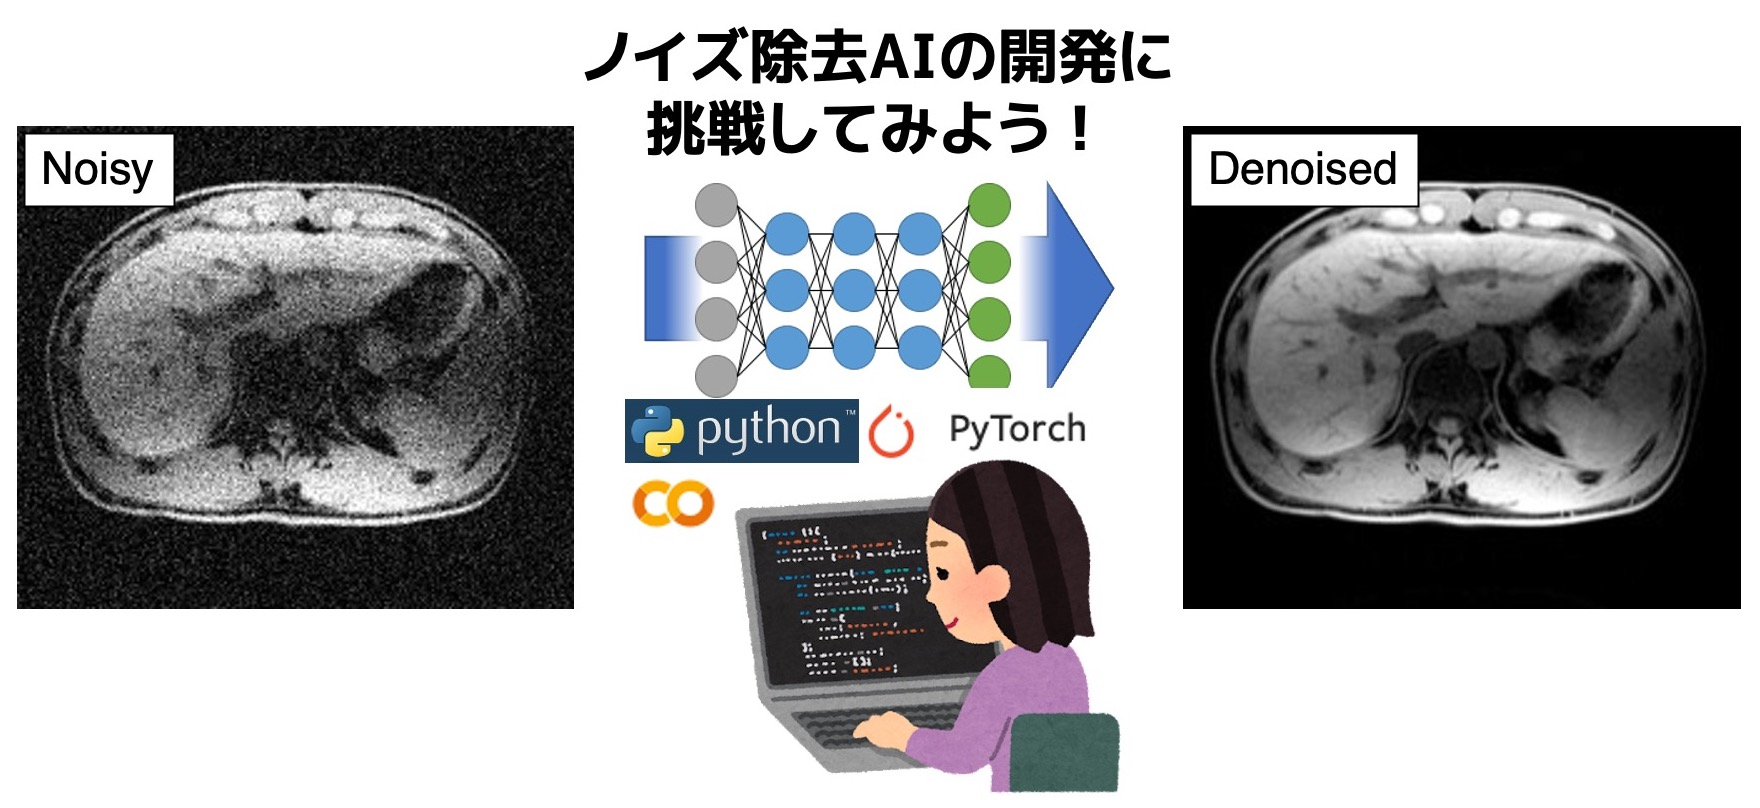

# 概要

このハンズオンではプログラミング言語pythonを使用して、MR画像からノイズを除去するAIの開発に挑戦します。

# 目次

1. Preparation
1. Exercise 1 - Python入門
2. Exercise 2 - PyTorch入門
3. Exercise 3 - ニューラルネットでXOR計算をしてみよう
4. Exercise 4 - MR画像からノイズを除去するAIを作ろう
5. Exercise 5 - 性能を改善する (Advanced)



# Prepartion - 準備体操

## Preparation 1 - セルの実行

colabでは、プログラムを「セル」という単位で実行していきます。

セルの下部にはセルの最終行の実行結果が出力されます。

下のセルを実行して出力を確認してみましょう。

- ctrl/cmd & Enter: セルを実行
- Shift + Enter: セルを実行＋次のセルを選択

In [ ]:
print("Hello, world!")

In [ ]:
# 「#」より右側はコメントと解釈され、プログラムに影響を与えません。

1.0 + 1.0   # -> 2

## Preparation 2 - GPUを有効化

GPU (graphics Processing Unit)を使用すると深層学習の計算を高速に行うことができます。

### GPUを有効化する手順

1. colabの上部メニュー > ランタイム > ランタイムのタイプを変更 を選択します。
1. 「ハードウェアアクセラレータ」を「GPU」にします。

次のセルを実行してGPUが使用できるようになっていることを確認します。

In [ ]:
print("pytorch.cuda.is_available():", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name())

## Preparation 3 - データのダウンロード

以降のセルの実行に必要なファイルをダウンロードするため、下のセルを実行します。

In [ ]:
# Dataset citation:
# 
# - A.E. Kavur, M. A. Selver, O. Dicle, M. Barış,  N.S. Gezer. CHAOS - Combined (CT-MR) Healthy Abdominal Organ Segmentation Challenge Data (Version v1.03) [Data set]. Apr.  2019. Zenodo. http://doi.org/10.5281/zenodo.3362844
#

# Install required libraries
!pip install pydicom gdown

# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import torch
import torch.nn as nn

# Preparing dataset
!mkdir dataset

import gdown
gdown.download('https://drive.google.com/u/0/uc?id=1f3MnUM8H1eVdEIF3Xhk6N_4kBM2wHQRE&export=download', 'jsmrm2022_ai_hands_on.zip', quiet=False)

!unzip -q -u -d ./ jsmrm2022_ai_hands_on.zip


# Exercise 1 - Python入門



### 変数

In [ ]:
# 変数は値やデータに名前をつけたものです。
# 一時的なデータの保存やデータの受け渡しに使用します。
# 適切な名前をつけることでプログラムの見通しが良くなります。
variable_a = 1.0
print("variable_a:", variable_a)

# 後から別の値を代入することもできます。
variable_a = 2.0
print("variable_a:", variable_a)

## リスト

In [ ]:
# リストは複数の値を1つにまとめたものです。配列と呼ばれることもあります。
# リストは[]を使って作ることができます。
list1 = [1, 2, 3, 4]

print(list1)

In [ ]:
# リストの値を参照するときにも[]を使います。
# 要素の番号は0から始まります。
print(list1[0])

## 条件分岐

In [ ]:
# if文を使うと与えた条件によって処理を分けることができます。
# コードの塊はインデント（tabキー）で表します。
if True:
    print("It's true.")
else:
    print("It's false.")

## 繰り返し

In [ ]:
# inの後ろの内容を順次取り出して変数iに代入して、コードブロックを繰り返し実行する。
for i in range(5):
    print(i)

## 関数

- 関数を使うと処理をまとめることができます。
- 用途
    - 処理を再利用
    - 処理のまとまりを明示する

In [ ]:
# 関数の定義
def foo(argument_string):
    # ↑引数：関数内の処理に必要な変数

    print(argument_string)

    # 関数が値を返す場合は"return 値"と記載します。
    return 1.0

foo("Hello, world!")

2.0

# Exercise 2 - PyTorchの基本

## PyTorchとは

プログラミング言語python用のニューラルネットワークを実装するためのライブラリ。

近年では非常に人気が高く、web上での情報も豊富で利用しやすい。

## pytorchの基本データ型

pytorchではtensor（テンソル）型というデータ形式を用いて計算処理を行います。

tensor型はpythonのlistやnumpyのndarrayなど、行列や配列と呼ばれるデータ型に似ています。

GPUアクセラレータ上で動作させることができたり、自動微分という機能を備えている点などが異なります。

In [ ]:
# tensor型の作り方
import torch
import torch.nn as nn

a = torch.tensor([1, 2, 3])
a

In [ ]:
# 基本演算

b = torch.tensor([4, 5, 6])

# +は要素毎の加算となる
a + b

In [ ]:
# *はスカラ倍もしくは要素毎の乗算となる
a * b

In [ ]:
2 * b

In [ ]:
# ベクトル積（内積）にはtorch.dot()を使用する。
torch.dot(a, b)

# Exercise 3 - ニューラルネットでXOR計算をしてみよう

## XOR回路とは？

XOR回路とは2つの入力と1つの出力を持つ回路で、下の表のようにどちらか一方が1の時に1を出力し、両方の入力が等しいときには0を出力する回路です。

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

このExerciseでは、XOR回路の計算を行うニューラルネットワークを作り、基本的なニューラルネットワーク学習の流れを学びます。

In [ ]:
# 学習用データを用意
data = torch.tensor(
    [[0.0, 0.0],
     [1.0, 0.0],
     [0.0, 1.0],
     [1.0, 1.0],]
)
answer = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

## 使用するニューラルネットワーク

3つのニューロンを使った2層のネットワークを使います。

それぞれのニューロンにweightとbiasがあります。

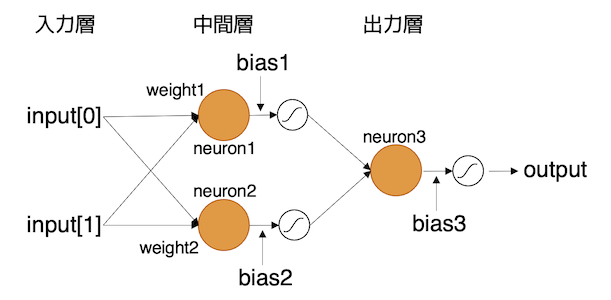

In [ ]:
# ニューラルネットワークを定義

# nn.Moduleを継承したクラスとしてネットワークを定義する
class XOR_Net(nn.Module):
    # __init__()関数の中でパラメータや活性化層などを定義する
    def __init__(self):
        super(XOR_Net, self).__init__()
        
        # 中間層（ニューロン 2個）
        self.weight1 = nn.Parameter(torch.tensor([0.5, 0.6]))
        self.bias1 = nn.Parameter(torch.tensor([-0.2]))

        self.weight2 = nn.Parameter(torch.tensor([-0.1, 0.23]))
        self.bias2 = nn.Parameter(torch.tensor([0.4]))

        # 出力層（ニューロン 1個）
        self.weight3 = nn.Parameter(torch.tensor([0.3, 0.5]))
        self.bias3 = nn.Parameter(torch.tensor([0.7]))

        # 活性化関数（シグモイド関数）
        self.activation = nn.Sigmoid()

    # forward()関数で計算処理を定義する
    # y = model(x) とした際に呼び出されるのがforward()
    def forward(self, input):
        '''
        Parameter
        =========

        - input: torch.tensor([a, b])　要素2つのベクトルを受け取る。
        '''
        # 中間層
        output1 = self.activation(torch.dot(input, self.weight1) + self.bias1)
        output2 = self.activation(torch.dot(input, self.weight2) + self.bias2)
        output_12 = torch.concat([output1, output2])

        # 出力層
        output = torch.dot(output_12, self.weight3) + self.bias3

        return output

## modelを生成し、学習前の状態を確認

In [ ]:
# modelを生成
model = XOR_Net()

In [ ]:
# 学習前の状態を確認
for i in range(len(data)):
  x = data[i,:]
  y = model(x)

  print("input:", x.tolist(), "-> predicted:", round(float(y), 3), "\t, true:", float(answer[i]))

In [ ]:
# modelのweight、biasを確認（初期値のままになっている）
for p in model.named_parameters():
    print(p)

## ネットワーク学習を行う

In [ ]:
# ネットワーク学習
# ================

# エポック数
n_epoch = 3000

# オプティマイザーを設定
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 学習曲線作成用
loss_list = []

for epoch in range(n_epoch):
    optimizer.zero_grad()
    loss = torch.tensor([0.0])

    # 4つのデータを読み込み、lossを計算
    for i in range(len(data)):
        x = data[i,:]
        y = model(x)

        loss += (y - answer[i]) ** 2
    
    # lossから各weight, biasの勾配を計算
    loss.backward()

    # 勾配を基にweight, biasを更新
    optimizer.step()

    # lossを学習曲線作成用に保存
    loss_list.append(float(loss))

    if 0 == epoch%10:
        print("\rEpoch:", epoch, "\t, loss:", float(loss), end='')

# 学習曲線を描画
plt.figure()
plt.plot(np.log(loss_list))
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
None

## 学習したネットワークを使いXOR計算ができるか確認する

In [ ]:
# 学習後の状態を確認
for i in range(len(data)):
  x = data[i,:]
  y = model(x)

  print("input:", x.tolist(), "-> predicted:", round(float(y), 3), ", true:", float(answer[i]))

-> 正しく推定できている。

In [ ]:
# 学習後の重みを確認
for p in model.parameters():
    print(p)

-> 学習により初期値から変化している

# Exercise 4 - MR画像からノイズを除去するAIを作ろう

いよいよMR画像からノイズを除去するAIの開発に入ります。

このexerciseでは5つのステップに分けて処理を行っていきます。

- 4.1 MR画像の読み込み
- 4.2 ノイズ付加関数の作成
- 4.3 ネットワーク定義（DnCNN）
- 4.4 ネットワーク学習
- 4.5 評価



## Exercise 4.1 MR画像の読み込み

このハンズオンでは公開されているMR画像データセット（[CHAOS](https://chaos.grand-challenge.org/)）を用いて、ノイズ除去を行うAIの開発を行います。

冒頭で行ったpreparationが上手くいっていれば、20例の肝臓 T1強調像（in-phase）がディレクトリ`dataset/JSMRM2022_CHAOS_partial`に保存されているはずです。

MR画像はDICOM（Digital Imaging and Communications in Medicine）という形式で保存されています。

多くの場合、DICOMファイル1つに、1枚の画像とヘッダー情報（検査や患者の情報、撮像条件、再構成条件など）が含まれています。

In [ ]:
# DICOMファイルの読み込み
dcm_path = 'dataset/JSMRM2022_CHAOS_partial/1/IMG-0004-00062.dcm'
dcm = pydicom.dcmread(dcm_path)

# ヘッダー情報の確認
print("Magnetic field strength:", dcm.MagneticFieldStrength)
print("Slice thickness:", dcm.SliceThickness)
print("Acquisition Matrix:", dcm.AcquisitionMatrix)

# ヘッダーを全て確認する際は下記をコメントインして実行
#[print(h) for h in dcm]

In [ ]:
# 画像の確認
img_raw = dcm.pixel_array.astype(np.float32)
plt.imshow(img_raw, cmap='gray')
plt.colorbar()

次に画像に前処理を行っていきます。

ネットワーク学習が上手く進むよう、画像内のピクセル輝度が0〜1に収まるように正規化(normalization)します。

In [ ]:
# 画像の前処理

# 0〜1に正規化する関数を定義
def normalize(img):
    val_max = np.max(img)
    val_min = np.min(img)

    if val_max > val_min: # ゼロ除算に対応
        ret = (img - val_min) / (val_max - val_min)
    else:
        ret = img

    return ret

# 画像を正規化
img = normalize(img_raw)

# 値の範囲をカラーバーで確認
# plt.figure()
# plt.imshow(img, cmap='gray')
# plt.colorbar()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
a0 = ax[0].imshow(img_raw, cmap='gray')
plt.colorbar(a0, ax=ax[0])
a1 = ax[1].imshow(img, cmap='gray')
plt.colorbar(a1, ax=ax[1])

## Exercise 4.2 ノイズ付加関数の作成

In [ ]:
rng = np.random.default_rng(0)

# 正規分布に従うノイズ画像を作成する関数
def gen_noise(img_size, noise_mean=0.0, noise_sigma=0.05):
    return rng.normal(noise_mean, noise_sigma, img.shape).astype(np.float32)

# ノイズ画像を生成
noise = gen_noise(img.shape)

# ノイズ画像を確認
plt.figure()
plt.imshow(noise, cmap='gray')
plt.colorbar()

In [ ]:
# ノイズを画像に付加する
img_noisy = img + noise

# 視覚的に確認
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Reference")

ax[1].imshow(img_noisy, cmap='gray')
ax[1].set_title("Noisy")

## Exercise 4.3 ネットワーク定義

ネットワークにはノイズ除去ネットワークであるDnCNNを使用します。

- Zhang K, et al. IEEE Trans on Image Process. 2017;26(7):3142-3155.

DnCNNは17層の畳み込み層（2D convolutional layer）から構成されるネットワークです（下図）。

ネットワーク自体は与えられた入力画像からノイズ成分のみを予測する、いわゆる残差型ネットワークとなっています。

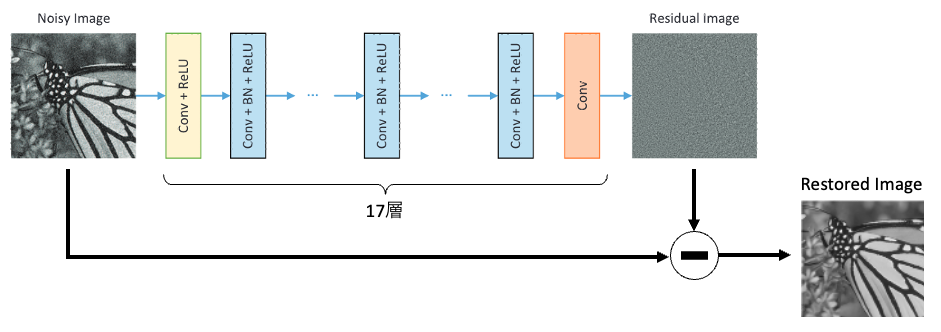

それではネットワークを定義していきます。

ここでは説明のためにコードを記載していますが、実際に行う際には参考論文の筆者等が公開しているreference codeを用いるのをオススメします。

深層学習ではネットワーク定義や学習時のちょっとした工夫、パラメータがポイントになる事があり、これらは論文紙面から理解するのは難しいこともあるためです。

In [ ]:
# DnCNN定義

class DnCNN(nn.Module):
    def __init__(self, n_in_channel=1, n_layers=17, n_features=64, bn_mo=0.1):
        super(DnCNN, self).__init__()
        layers = []

        # Conv2d等のレイヤーを順番に定義していく。
        ## 第1層目
        layers.append(nn.Conv2d(n_in_channel, n_features, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU(inplace=True))

        # 中間層
        # 同じ構造の繰り返しなのでforループを使って定義する
        for i in range(n_layers - 2):
            layers.append(nn.Conv2d(n_features, n_features, kernel_size=3, padding=1))
            layers.append(nn.BatchNorm2d(n_features, momentum=bn_mo))
            layers.append(nn.ReLU(inplace=True))

        # 最終層
        layers.append(nn.Conv2d(n_features, n_in_channel, kernel_size=3, padding=1))

        # 重ねたConv2dや活性化関数（ReLU）などを1つにまとめる
        self.layers = nn.Sequential(*layers)

        # weightsを初期化
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, inputs):
        y = inputs
        residual = self.layers(y)
        return y - residual


## Exercise 4.4 ネットワーク学習

用意した画像とネットワークを使って学習を行います。

学習のコードは`XOR_Net`の学習に使用したものをベースにしています。

In [ ]:
# ネットワーク学習
# ================

# エポック数
n_epoch = 500

# モデルを生成
model = DnCNN().cuda()

# 学習データを用意
training_data = [torch.tensor(img_noisy).cuda().reshape((1, 1, *img.shape))]
reference_data = [torch.tensor(img).cuda().reshape((1, 1, *img.shape))]

# オプティマイザー等を設定
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# 学習曲線作成用
loss_list = []

for epoch in range(n_epoch):
    optimizer.zero_grad()

    # 画像をモデルに入力しノイズ除去像を計算する
    x = training_data[0]
    ref = reference_data[0]
    y = model(x)

    # lossを計算
    loss = criterion(y, ref)
    
    # lossから各weight, biasの勾配を計算
    loss.backward()

    # 勾配を基にweight, biasを更新
    optimizer.step()

    # 学習曲線作成用
    loss_list.append(float(loss))

    # 現在のlossを表示
    if 0 == epoch % 10:
        print("\rEpoch:", epoch, "\t, loss:", float(loss), "   ", end="")

# 学習曲線を描画
plt.figure()
plt.plot(np.log(loss_list))
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
None


## Exercise 4.5 評価

学習したネットワークを使ってノイズ除去された画像を確認してみましょう。

### 学習に使用した画像をデノイズする

In [ ]:
model.eval()
img_denoised = model(training_data[0]).squeeze().cpu().detach().numpy()

# 視覚的に確認
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img_noisy, cmap='gray', vmin=-0.2, vmax=0.7)
ax[0].set_title("Noisy")

ax[1].imshow(img_denoised, cmap='gray', vmin=-0.2, vmax=0.7)
ax[1].set_title("Denoised")

ax[2].imshow(img, cmap='gray', vmin=-0.2, vmax=0.7)
ax[2].set_title("Reference")

print("MSE:", np.sum((img_denoised - img)**2)/np.prod(img.shape))

### 学習に使用していない画像をデノイズしてみる

In [ ]:
# 画像読み込み
dcm_path = 'dataset/JSMRM2022_CHAOS_partial/21/IMG-0004-00054.dcm'
dcm = pydicom.dcmread(dcm_path)
img2 = normalize(dcm.pixel_array.astype(np.float32))

# ノイズ画像生成
img2_noisy = img2 + gen_noise(img2.shape)

# DnCNNでデノイズ
model.eval()
img2_denoised = model(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2.shape))).squeeze().cpu().detach().numpy()

# 表示
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0].set_title("Noisy")

ax[1].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1].set_title("Denoised")

ax[2].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[2].set_title("Reference")

print("MSE (training image):", np.sum((img_denoised - img)**2)/np.prod(img.shape))
print("MSE (this image):    ", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))

-> 視覚的には十分改善しているが、1つ前の画像に比較してMSEが大きくdenoise効果が弱い。

# Exercise 5 - 性能を改善する (Advanced)

性能を改善するには多くの方法がありますが、よく行われるものとして下記のようなものがあります。

- 学習データに工夫を加える。
    - **データ数を増やす**。
    - データ自体に工夫を加える。
- 学習パラメータを調整する。
- 損失関数(Loss)を変更する。
- ネットワークを変更する。
    - 層を増やす。
    - ネットワーク構造自体を変更する。

ここでは一例として**データ数を増やす**ケースを実行してみます。

## Exercise 5.1 - 学習データ数を増やす

### Dataset & DataLoaderを使用する

DataLoaderはネットワーク学習に用いるデータを簡単に扱えるようにしてくれるクラスです。

引数に渡すdatasetクラスを自分で定義することができ、様々なメリットがあります。

- ネットワーク学習用コードと学習データを扱うコードを分離できる。
- ネットワーク学習用コードの見通しが良くなる。
- 別の形式のデータ（DICOM画像ではなくjpg画像など）を用いる場合でも、データに合わせたdataLoaderを定義、切り替えるだけで対応できる。

In [ ]:
# DICOM画像を読み込むdatasetを定義
import glob
import os

from torch.utils.data import Dataset
from torchvision import transforms


# DICOM画像を読み込むdatasetを定義
class DcmImages(Dataset):
    def __init__(self, dcm_root_dir="dataset/JSMRM2022_CHAOS_partial/",
                 noise_mean=0.0, noise_sigma=0.05, img_size=256):
        self.root_dir = dcm_root_dir
        self.noise_mean = noise_mean
        self.noise_sigma = noise_sigma
        self.img_size = img_size

        # DICOM画像のリストを初期化
        self.dcm_path_list = self.search_dcm_files(self.root_dir)
        
    def __getitem__(self, index):
        # 与えられたindexのDICOM画像を読み込む
        dcm = pydicom.dcmread(self.dcm_path_list[index])

        # torch.tensor型に変換
        img = torch.tensor(dcm.pixel_array.astype(np.float32)).unsqueeze(0)

        # 値が0〜1の範囲になるよう正規化
        img = self.normalize(img)

        # 画像サイズが揃うようにリサイズ
        img = transforms.functional.resize(img, (self.img_size, self.img_size))
        
        # ノイズを付加
        img_noisy = img + torch.normal(self.noise_mean, self.noise_sigma, size=img.shape)
        
        # DataLoaderに値を返す
        return img, img_noisy

    def __len__(self):
        return len(self.dcm_path_list)
    
    def normalize(self, img):
        val_max = torch.max(img)
        val_min = torch.min(img)

        if val_max > val_min:
            ret = (img - val_min) / (val_max - val_min)
        else:
            ret = img

        return ret

    def search_dcm_files(self, root_dir):
        return [p for p in glob.glob(os.path.join(root_dir, "**/*")) if pydicom.misc.is_dicom(p)]

定義したDatasetを使ってネットワーク学習を行っていきます。

In [ ]:
# ネットワーク学習
# ================
from torch.utils.data import DataLoader

# エポック数とミニバッチサイズ
n_epoch = 1
batch_size = 10

# モデルを生成
model2 = DnCNN().cuda()

# 学習データを用意
dataset = DcmImages()
dataloader = DataLoader(dataset, batch_size, shuffle=True)
print("Dataset size:", len(dataset), "images")

# オプティマイザー等を設定
optimizer = torch.optim.Adam(model2.parameters())
criterion = nn.MSELoss()

# 学習曲線作成用
loss_list = []

for epoch in range(n_epoch):

    # DataLoaderを使い、ミニバッチ毎に計算する
    for i, (img, img_noisy) in enumerate(dataloader):
        img = img.cuda()
        img_noisy = img_noisy.cuda()

        optimizer.zero_grad()

        # 画像をモデルに入力しノイズ除去像を計算する
        img_denoised = model2(img_noisy)

        # lossを計算
        loss = criterion(img, img_denoised)
    
        # lossから各weight, biasの勾配を計算
        loss.backward()

        # 勾配を基にweight, biasを更新
        optimizer.step()

        # lossを学習曲線作成用に保存
        loss_list.append(float(loss))
        if 0 == i % 5:
            print("\rEpoch:", epoch, "\t, batch:", i, "\t, loss:", float(loss), "     ", end="")

# 学習曲線を描画
plt.figure()
plt.plot(np.log(loss_list))
plt.title("Training curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")

より多くの画像（1→647枚）を使って学習したネットワークを使って先程の画像をデノイズしてみます。

In [ ]:
# DnCNNでデノイズ
model2.eval()
img2_denoised_model2 = model2(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2_noisy.shape))).squeeze().cpu().detach().numpy()

# 表示
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(wspace=0.1, hspace=0.35)

ax[0, 0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 0].set_title("Noisy")

ax[0, 1].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 1].set_title("Reference")

ax[1, 0].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 0].set_title("Denoised\n(trained 1 image)")

ax[1, 1].imshow(img2_denoised_model2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 1].set_title("Denoised\n(trained 647 images)")


print("MSE:", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))

## Exercise 5.2 - 事前に学習された重みを使ってみる

先程の647画像を使用して100 epoch学習した重みを読み込んでみます。

In [ ]:
# modelを読み込み
model_path = 'dncnn_epoch100_bs10.pth'

model3 = DnCNN()
model3.load_state_dict(torch.load(model_path))

In [ ]:
# DnCNNでデノイズ
model3.cuda()
model3.eval()
img2_denoised_model3 = model3(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2_noisy.shape))).squeeze().cpu().detach().numpy()

# 表示
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.1, hspace=0.35)

ax[0, 0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 0].set_title("Noisy")

ax[0, 1].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 1].set_title("Reference")

ax[0, 2].remove()

ax[1, 0].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 0].set_title("Denoised\n(trained 1 image)")

ax[1, 1].imshow(img2_denoised_model2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 1].set_title("Denoised\n(trained 647 images)\n4 epoch")

ax[1, 2].imshow(img2_denoised_model3, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 2].set_title("Denoised\n(trained 647 images)\n100 epoch")


print("MSE:", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))